In [43]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

# Load your dataset
df = pd.read_csv("shoe_catalog_with_offers_1000.csv")

# STEP 1: Simulate a 'Sales' column for model training (optional, remove if real data exists)
np.random.seed(42)  # For reproducibility
df['Simulated_Sales'] = (1000 - df['Price']) * (df['Offer_Percent'] / 100) + np.random.normal(0, 10, size=len(df))

# STEP 2: Train a model on available data
X = df[['Price', 'Offer_Percent']]
y = df['Simulated_Sales']
model = LinearRegression()
model.fit(X, y)

# STEP 3: Recommendation function that also predicts sales
def recommend_shoes(brand, shoe_type, max_price, min_offer=0):
    filtered_shoes = df[
        (df["Brand"].str.lower() == brand.lower()) & 
        (df["Shoe_Type"].str.lower() == shoe_type.lower()) & 
        (df["Price"] <= max_price) & 
        (df["Offer_Percent"] >= min_offer)
    ]

    if not filtered_shoes.empty:
        # Predict sales for recommended shoes only
        filtered_shoes = filtered_shoes.copy()
        filtered_shoes['Predicted_Sales'] = model.predict(filtered_shoes[['Price', 'Offer_Percent']]).round(0).astype(int)

    return filtered_shoes.sort_values(by="Price").reset_index(drop=True)

# STEP 4: Get user input
user_brand = input("Enter preferred brand (e.g., Nike): ")
user_type = input("Enter shoe type (e.g., Running): ")
user_max_price = float(input("Enter maximum price: "))

# STEP 5: Get recommendations and predicted sales
recommendations = recommend_shoes(user_brand, user_type, user_max_price)

# STEP 6: Display results
if not recommendations.empty:
    print("\nRecommended Shoes with Predicted Sales:")
    print(recommendations[["Shoe_ID", "Brand", "Shoe_Type", "Price", "Offer_Percent", "Offer_Price", "Predicted_Sales"]].to_string(index=False))
else:
    print("\nNo shoes found matching your preferences.")



Recommended Shoes with Predicted Sales:
Shoe_ID Brand Shoe_Type  Price  Offer_Percent  Offer_Price  Predicted_Sales
  S0073  Nike   Running     61             10         54.9               98
  S0071  Nike   Running     96             20         76.8              180
  S0682  Nike   Running     98             25         73.5              224


In [45]:
df.head(10)

,Shoe_ID,Brand,Shoe_Type,Price,Offer_Percent,Offer_Price,Simulated_Sales
0,S0001,Nike,Casual,134,0,134.00,4.967142
1,S0002,Nike,Casual,180,25,135.00,203.617357
2,S0003,Puma,Sports,112,30,78.40,272.876885
3,S0004,Woodland,Sandals,57,15,48.45,156.680299
4,S0005,Adidas,Running,76,20,60.80,182.458466
5,S0006,Vans,Running,151,20,120.80,167.458630
6,S0007,Converse,Formal,113,25,84.75,237.542128
7,S0008,Converse,Training,146,10,131.40,93.074347
8,S0009,Woodland,Sneakers,95,0,95.00,-4.694744
9,S0010,Vans,Formal,153,15,130.05,132.475600


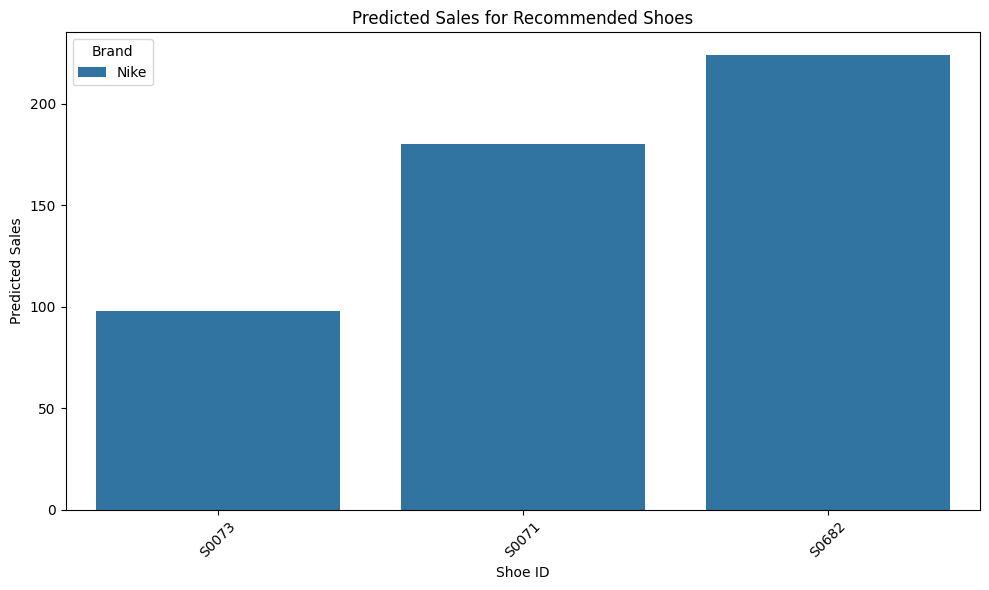

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

if not recommendations.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=recommendations,
        x="Shoe_ID",
        y="Predicted_Sales",   # Correct capitalization
        hue="Brand",
        dodge=False
    )
    plt.title("Predicted Sales for Recommended Shoes")
    plt.xlabel("Shoe ID")
    plt.ylabel("Predicted Sales")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
